# CHAPTER.05 회귀

## 01. 회귀 소개

: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법. 통계학 용어로는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다.

**머신러닝 회귀 예측의 핵심**은 주어진 피처(X)와 결정 값(y) 데이터 기반에서 하습을 통해 최적의 회귀 계수(w)를 찾아내는 것이다.
회귀에서 가장 중요한 것은 회귀 계수이다.
<img src="https://t1.daumcdn.net/cfile/tistory/997621435F3F61C01E">

여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용되는데, 선형 회귀는 실제 값과 예측 값의 차이(오류의 제곱 값)을 최소화하는 직선형 회귀선을 최적화하는 방식이다.

선형 회귀 모델은 **규제(regularization) 방법**에 따라 다시 별도의 유형으로 나뉠 수 있다.(규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말한다.)

- 대표적인 선형 회귀 모델
    - **일반 선형 회귀** : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제 적용하지 않은 모델
    - **릿지(Ridge)** : 선형 회귀에 L2 규제를 추가한 회귀 모델이다. L2 규제는 상대적으로 큰 회귀 계수 값의 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제모델이다.
    - **라쏘(Lasso)** : 선형 회귀에 L1 규제를 적용한 방식이다. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. (피처 선택 기능으로도 불린다.)
    - **엘라스틱넷(ElasticNet)** : L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용된다. L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.
    - **로지스틱 회귀(Logistic Regression)** : 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다. 매우 강력한 분류 알고리즘으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다.

## 02. 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀이다. 예측값 Ŷ는 w₀ + w₁ * X로 계산할 수 있다. 독립변수가 1개인 단순 선형 회귀에서는 이 기울기 w1과 절편 w0을 회귀 계수로 지칭한다. 그렇다면 실제 값은 이러한 1차 함수 값에서 실제 값만큼의 오류 값을 뺀(또는 더한) 값이 된다.

- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값.(남은 오류)
- 최적의 회귀 모델을 만든다는 것 
    1. 전체 데이터의 잔차(오류 값)의 합이 최소가 되는 모델을 만든다.
    2. 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다.

<img src="https://blog.kakaocdn.net/dn/61TQn/btqEsEDVIYR/cqybjRuqO7GIXLKgb2hK9k/img.png" height="500px" width="500px">

이렇듯 오류 값은 +나 -가 될 수 있다. 따라서 오류 합을 계산할 때는 절댓값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS)을 취한다. 일반적으로 미분 등의 계산을 편리하게 하기 위해 RSS방식으로 오류 합을 구한다. 즉, Error² = RSS이다.

RSS를 최소로 하는 w0, w1, 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다. RSS는 회귀 식의 독립변수 X, 종속 변수 Y가 중심 변수가 아니라 **w 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요하다**

회귀에서 RSS는 비용(Cost)이며, w 변수로 구성되는 RSS를 비용함수(손실함수 loss function)라고 한다. 


머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다.

## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

w 파라미터 개수가 적다면 고차원 방정식으로 비용 함수가 최소가 되는 W 변숫값을 도출할 수 있겠지만, w 파라미터가 많으면 고차원 방정식을 동원하더라도 해결하기 어렵다.

**경사 하강법**은 이러한 **고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식이다.**
- 반복적으로 비용함수의 반환 값, 즉 예측 값과 실제 값의 차이가 작아지는 방향성을 가지고 w파라미터를 지속해서 보정해 나간다. 그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 w값을 최적 파라미터로 반환한다.

<img src="https://cdn-images-1.medium.com/max/1600/0*rBQI7uBhBKE8KT-X.png" height="500px" width="500px">
최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트한다. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주하고 그때의 w를 반환한다.

경사 하강법은 새로운 w₁ = 이전w₁ + $\eta\frac{2}{N}\sum _{i=1}^n$xᵢ*(실제값ᵢ - 예측값ᵢ), 새로운 w₀ = 이전w₀ + $\eta\frac{2}{N}\sum _{i=1}^n$xᵢ*(실제값ᵢ - 예측값ᵢ)을 반복적으로 적용하면서 비용 함수가 최소가 되는 값을 찾는다.

간단한 회귀식인 y = 4X + 6을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀계수 𝑤₁,𝑤₀을 도출해보자

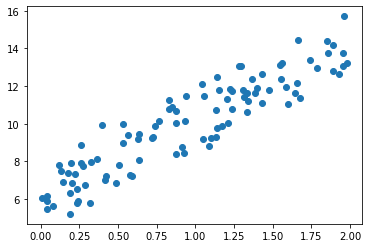

In [1]:
# 단순 선형 회귀로 예측할 만한 데이터 세트 먼저 만들기

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(𝑤₁=4,𝑤₀=6), 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4* X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

- .rand() : 0부터 1사이의 균일한 확률 분포로 실수 난수를 생성
- .randn() : 기댓값이 0이고 표준편차가 1인 가우시안 표준 정규 분포를 따르는 난수를 생성

In [8]:
# 비용함수(RSS) 정의

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

In [5]:
# 경사 하강법을 함수를 생성해 구현하기
# w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트한다.

# w1과 w0를 업데이트할 w1_update, w0_update를 반환
# X와 y는 위에서 무작위로 생성한 값. 둘다 넘파이 ndarray이다.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 에측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 초렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

- numpy.dot : numpy array를 곱할 때 사용한다.
- numpy.ndarray.T : 2차원 행렬 전치

In [7]:
# get_weight_updates()를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트하는 함수 만들기

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용한다.
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1를 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [9]:
# w1, w0 값 구하고 get_cost() 함수를 이용해 경사 하강법의 예측 오류 계산하기

w1, w0 = gradient_descent_steps(X, y, iters=10000)
print("w1: {0:.3f} w0: {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.968 w0: 6.222
Gradient Descent Total Cost: 0.9924


실제 선형식인 y = 4X + 6과 유사하게 w1은 3.968, w0은 6.222가 도출되었다. 예측 오류 비용은 약 0.9924이다.

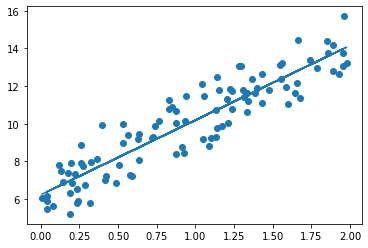

In [12]:
# 앞에서 구한 y_pred에 기반해 회귀선 그리기
plt.scatter(X, y)
plt.plot(X, y_pred)

일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행시간이 매우 오래 걸린다는 단점이 있다.

그때문에 실전에서는 대부분 **확률적 경사 하강법(Stochastic Gradint Descent)**를 이용한다. 
- 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트 되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다.
    - 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다.

In [16]:
# (미니 배치) 확률적 경사 하강법 함수로 구현하기
"""
앞에서 생성한 gradient_descent_steps()와 크게 다르지 않다.
다만 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해, 
이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있다.
"""

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000) :
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤(permutation()이용)하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 bath_size만큼 추출된 데이ㅓ 기반으로 w1_update, w0_date 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [17]:
# w1, w0 및 예측 오류 비용 계산

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=10000)
print("w1: ", round(w1[0, 0], 3), "w0: ", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1:  3.988 w0:  6.244
Stochastic Gradient Descent Total Cost: 0.9942


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.9924로 경사 하강법으로 구한 예측 오류 비용 0.9942보다 아주 조금 높을 뿐으로 큰 예측 성능상의 차이가 없음을 알 수 있다. 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용한다.

**피처가 여러 개인 경우, 회귀 계수 도출하기**
- 피처가 여러개인 경우도 1개인 경우를 확장해 유사하게 도출할 수 있다.
- 피처가 M개 있다면 그에 따른 회귀 계수도 M + 1(1개는 w0)개로 도출된다.
- 회귀 계수가 많아지더라도 선형대수를 이용해 간단하게 예측값을 도출할 수 있다.
- 데이터의 개수가 N이고 피처 M개의 입력 행렬을 Xmat, 회귀 계수 w1, w2 ... w100을 W 배열로 표기하면 예측 행렬 Ŷ = np.dot(Xmat, W) + w0로 구할 수 있다.

## 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
### LinearRegression 클래스 - Ordinary Least Squares

: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스이다.
LinearRegression 클래스는 fit()메서드로 X, y 배열을 입력 받으면 회귀 계수(Coefficients)인 w를 coef_속성에 저장한다.

In [ ]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False,
                                           copy_X=True, n_jobs=1)

- 입력 파라미터
    - **fit_intercept** : 불린 값으로, 디폴트는 True. intercept(절편) 값을 계산할 것인지 말지를 지정한다. False로 지정하면 intercept가 사용되지 않고 0으로 지정된다.
    - **normalize** : 불린 값으로 디폴트는 False이다. fit_intercept가 False인 경우에는 파라미터가 무시된다. True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다.


- 속성
    - **coef_** : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. shape는 (target 값 개수, 피처 개수)
    - **intercept_** : intercept 값

Ordinary Least Squares(최소제곱법, 최소자승법) 기반의 회귀계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해진다. 이를 **다중 공선성(multi-collinearity)**문제라 한다.

### 회귀 평가 지표
: 실제 값과 회귀 예측 값의 차이 값을 기반으로한 지표가 중심
- **MAE** : |실제값 - 예측값|의 평균
- **MSE** : (실제값 - 예측값)²의 평균
- **RMSE** : MSE에 루트를 씌운것
- **R²** : 예측값의 분산 / 실제 값의 분산. 1에 가까울수록 예측 정확도가 높다.


cross_val_score, GridSearchCV와 같은 **scoring 함수에 회귀 평가 지표를 적용할 때 한가지 유의할 점**

'neg_mean_absolute_error'(MAE)가 의미하는 것은 -1 * metrics.mean_absolute_error()이다. 


왜냐하면 사이킷런의 scoring함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문이다. 그런데 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런 scoring 함수에 일반적으로 반영하려면 보정이 필요하다. 따라서 -1을 평가 지표 값에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다.

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
LinearRegression 클래스를 이용해 선형 회귀 모델 만들기

In [42]:
# 해당 데이터 세트를 로드하고 데이터프레임으로 변경하기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 데이터프레임 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 데이터프레임에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


데이터 세트 피처의 Null값은 없으며 모두 float형이다.

- seaborn의 regplot() : X, Y축 값의 산점도와 함께 선형 회귀 직선을 그려준다.
- matplotlib.subplots() : 여러개의 그래프를 한번에 표현하기 위해 자주 사용
    - 인자
        - ncols : 열 방향으로 위치할 그래프의 개수
        - nrows : 행 방향으로 위치할 그래프의 개수

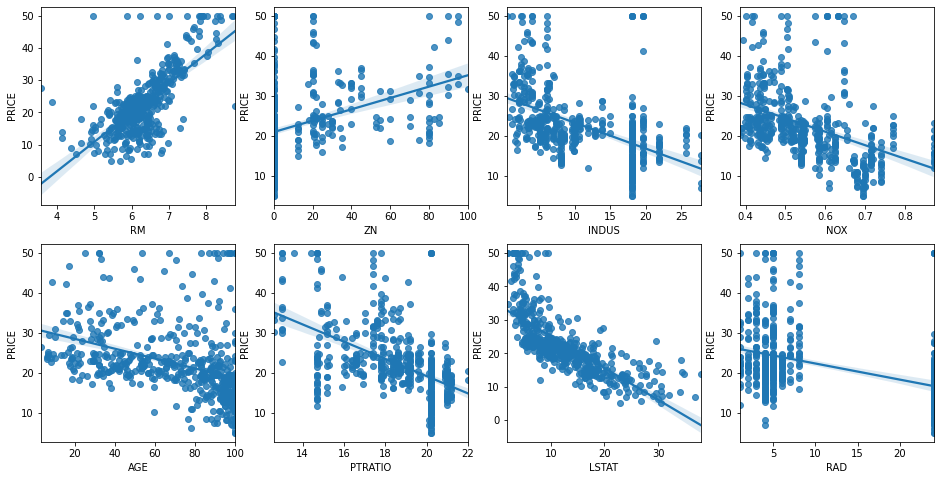

In [44]:
# 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화하여 알아보기
# 8개의 칼럼에 대해 값이 증가할수록 PRICE값이 어떻게 변하는지 확인

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
# 각 ax마다 칼럼과 PRICE의 관계를 표현
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현s
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다.

RM(방 개수)는 양방향의 선형성(Positive Linearity)이 가장 크다. 즉, 방의 크기가 클수록 가격이 증가하는 것을 확연히 보여준다. LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 크다. LSTAT이 적을수록 PRICE가 증가하는 모습이 확연히 나타난다.

In [45]:
# LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 만들기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                   random_state=156)

In [46]:
# 선형 회귀로 OLS 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.4f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.1590
Variance score: 0.757


In [47]:
# LinearRegression으로 생성한 주택가격 모델의 inercept(절편)과 coefficients(회귀 계수)값 구하기

print('절편 값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편 값:  40.995595172164336
회귀 계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [48]:
# coef_ 속성은 회귀 계수 값만 가지고 있다.
# 따라서 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값순으로 출력

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의 !
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크다. NOX 피처의 회귀 계수 - 값이 너무 크다.

In [49]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
# cross_val_score()의 인자로 scoring='neg_mean_squred_error'를 지정하면 반환되는 수치 값은 음수
# 따라서 cross_val_score()에서 반환된 값에 다시 -1를 곱해야 양의 값인 원래 모델에서 계산된 MSE값이 된다.
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


## 05. 다항 회귀와 과(대)적합 / 과소적합 이해
### 다항 회귀 이해

- **다항(Polynomial) 회귀** : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
    - y = w0 + w1*x1 + w2*x2 + w3*x1*x2 + w4*w1² + w5*x2²
- 주의할 점 : 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀라는 것이다.
    - 회귀에서 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.

사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀 이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. 이를 위해 사이킷런은 **PolynomialFeatures 클래스**를 통해 피처를 Polynomial(다항식) 피처로 변환한다.
- PolynomialFeatures 클래스는 **degree 파라미터**를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다.

In [51]:
# PolynomialFeautres를 이용해 단항값을 2차 다항값으로 변환하는 예제

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


이렇게 변환된 Polynomial 피처에 선형 회귀를 적용해 다항 회귀를 구현한다.

In [52]:
# 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도하기
# 이를 위해 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수 예측

# 3차 다항 계수 피처 값이 입력되면 결정 값을 반환한다.
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [53]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


단항 계수 피처 [x₁, x₂]를 3차 다항 계수 [1, x₁, x₂, x₁², x₁x₂, x₂², x₁³, x₁²x₂, x₁x₂², x₁³]와 같이 10개의 다항 계수로 변환했다.

In [54]:
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomail 회귀 Shape :', model.coef_.shape)

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomail 회귀 Shape : (10,)


회귀 계수도 10개로 늘어난 것을 알 수 있다.

원래 다항식 계수 값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와는 차이가 있지만 다항 회귀로 근사하고 있음을 알 수 있다.

→ 이처럼 사이킷런은 PolynomialFatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현한다.

#### Pipeline 객체 이용
피처 변환과 선형 회귀 적용을 각각 별도로 하지 않고, 한 번의 다항 회귀를 구현하기. 여러 처리 단계를 하나의 scikit-learn 추정기 형태로 묶어준다.

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) :
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

# named_steps : 단계 이름을 키로 가진 딕셔너리 형태. 파이프라인의 각 단계에 쉽게 접근 가능하다.
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다.

하지만! 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다. **즉, 차수가 높아질수록 과적합의 문제가 크게 발생한다.**

In [56]:
# 다항 회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예제

# 소스코드 설명
# 원래 데이터 세트는 피처 X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어준다.
# 그리고 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제

# 학습데이터응 30개의 임의의 데이터인 X, 그리고 X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성된다.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터이다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값이다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987231718 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE는 182815433.5604608 입니다.


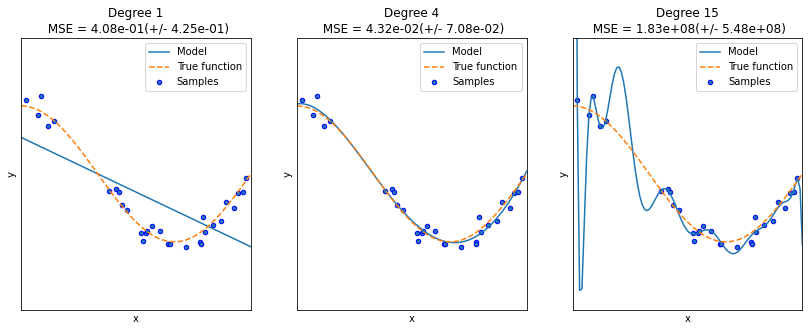

In [57]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교한다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\n MSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선이다. 점선으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선이다.
- Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 되었다.

- Degree 4 예측 곡선은 실제 데이터 세트와 유사한 모습이다. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었다. MSE값도 가장 높다.

- Degree 15 예측 곡선은 MSE값이 182815432가 될 정도로 어처구니 없는 오류 값이 발생했다. 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었다.


결국 좋은 예측 모델은 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델을 의미한다.

### 편향-분산 트레이드오프(Bias-Variance Trade off)
- degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있다. 이런 모델을 **고편향(High Bias)**성을 가졌다고 표현한다.
- degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었다. 이런 모델을 **고분산(High Variance)**성을 가졌다고 표현한다.

<img src="http://www.endtoend.ai/assets/blog/misc/bias-variance-tradeoff-in-reinforcement-learning/front.png" height="500px" width="500px">


- 상단 왼쪽의 **저편향/저분산** : 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중돼 있는 아주 뛰어난 성능을 보여준다.
- 상단 오른쪽의 **저편향/고분산** : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 시제 결과를 중심으로 꽤 넓은 부분에 분포돼있다.
- 하단 왼쪽의 **고편향/저분산** : 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중돼있다.
- 하단 오른쪽의 **고편향/고분산** : 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포돼 있다.

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합)

#### 편향과 분산의 관계에 따른 전체 오류값의 변화
<img src="https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png?w=640" height="500px" width="600px">

즉, 편향과 분산이 서로 트레이트오프를 이루면서 오류 Cost값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.

## 06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
### 규제 선형 모델의 개요
회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야한다.
- 비용함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야한다. 
- 비용 함수 목표 = Min(RSS(W) + alpha * ∥W∥₂²)
    - (RSS(W) + alpha * ∥W∥₂²)를 최소화하는 W 벡터를 찾는 것이다.
    - alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
        - alpha 값을 크게 하면 : 비용함수는 회귀 계수 W값을 작게 해 과적합을 개선 할 수 있다.
            - alpha가 0인 경우, 비용함수는 Min(RSS(W))이다.
        - alpha 값을 작게 하면 : 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.
            - alpha가 무한대인 경우,  alpha * ∥W∥₂²도 무한대가 되므로 비용함수는 W를 0에 가깝게 최소화 해야한다.
        - alpha를 0에서부터 지속적으로 값을 증가시키면서 회귀 계수 값의 크기를 감소시킬 수 있다. 

- **규제** : 비용함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
- **L2 규제** : alpha * ∥W∥₂²와 같이 W의 **제곱**에 대해 페널티 부여하는 방식
- **L1 규제** : alpha * ∥W∥₁와 같이 W의 **절댓값**에 대해 페널티 부여. 영향력이 크지 않은 회귀 계수 값 0으로 변환


W를 줄인다 -> 규제를 통해 필요없는 변수의 크기를 줄여서(아님 0으로) 영향도를 작게 만든다.

### 릿지 회귀
- Ridge 클래스를 통해 릿지 회귀 구현
    - 주요 생성 파라미터
        - alpha : L2 규제 계수

In [58]:
# 보스턴 주택 가격 Ridge클래스를 이용해 다시 예측하고, 예측 성능 cross_val_score()로 평가
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
# LinearRegression 예제에서 사용한 데이터 세트 이용
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


앞 예제의 규제 없는 선형회귀의 RMSE 평균 값 5.836보다 더 뛰어난 예측 성능을 보인다.

In [59]:
# 릿지 alpha값 변화시키면서 RMSE와 회귀 계수 값의 변화 살펴보기

# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1일 때 5 folds의 평균 RMSE: 5.788
alpha 1일 때 5 folds의 평균 RMSE: 5.653
alpha 10일 때 5 folds의 평균 RMSE: 5.518
alpha 100일 때 5 folds의 평균 RMSE: 5.330


alpha가 100일때 평균 RMSE가 5.330으로 가장 좋다.

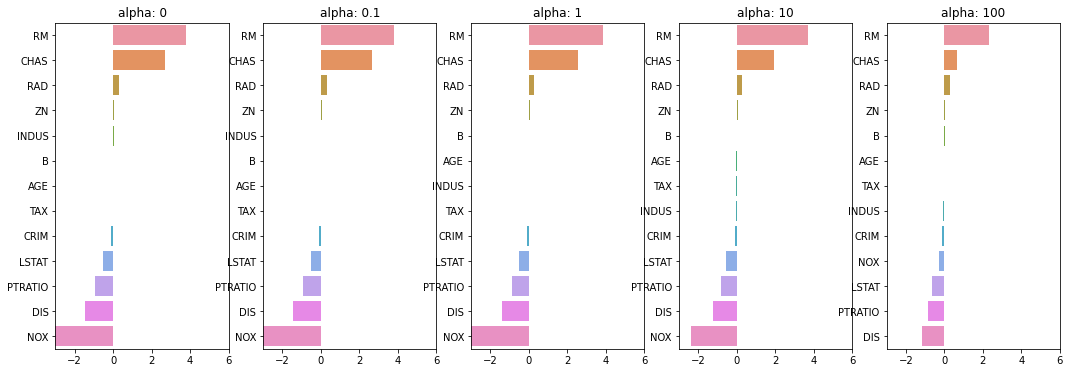

In [60]:
# alpha 값의 변화에 따른 피처 회귀 계수 값을 가로 막대 그래프로 시각화

# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 Dataframe 생성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 series로 변환하고 ㅇㅣ를 dataframe의 칼럼으로 ㅊㅜ가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha: '+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 맷 플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 dataframe으로 표시
plt.show()

alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐을 알 수 있다. (특히 NOX피처)

In [61]:
# dataframe에 저장된 alpha값의 변화에 따른 릿지 회귀 계수 값 구하기
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha: '+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀
: W의 절댓값에 페널티를 부여하는 L1규제를 선형회귀에 적용한 것. 불필요한 계수를 ㄱㅡㅂ격하게 감소시켜 0으로 만들고 제거한다. 이러하여 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있다.
- alpha * ∥W∥₁
- 목표 : RSS(W) + alpha * ∥W∥₁ 식을 최소화하는 W를 찾는 것

- Lasso 클래스를 통해 라쏘 회귀 구현
    - 주요 생성 파라미터
        - alpha : L1 규제 계수

In [62]:
# 라쏘의 alpha값을 변화시키면서 RMSE와 각 피처의 회귀계수 출력
# 이의 수행을 위한 함수 만들기

from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                       verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                        scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 dataframe의 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha: '+str(param)
            coeff_df[colname] = coeff
            
    return coeff_df
# end of get_linear_regre_eval

In [63]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


alpha가 0.07일 때 가장 좋은 평균 RMSE를 보여준다. 릿지 평균 5.330보다는 약간 떨어지는 수치이지만, 선형 회귀 평균인 5.836보다는 향상되었다.

In [64]:
# alpha값에 따른 피처별 회귀 계수

# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 dataframe 출력
sort_column = 'alpha: '+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있다.

### 엘라스틱넷 회귀
: L2규제와 L1규제를 결합한 회귀. 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다. 이러한 ㅅㅓㅇ향으로 인해 alpha값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데, 엘라스틱넷 회귀는 이를 완화하기 위해 L2규제를 라쏘 회귀에 추가한 것이다.
- 목표 : RSS(W) + alpha * ∥W∥₂² + alpha * ∥W∥₁ 식을 최소화하는 W를 찾는 것
- 단점 : 수행시간이 상대적으로 오래 걸린다.

- ElasticNet 클래스를 통해 엘라스틱넷 회귀 구현
    - 앞의 Ridge와 Lasso 클래스의 alpha값과 다르다. 엘라스틱넷의 규제는 a + L1 + b * L2로 정의될 수 있으며, 이 때 a는 L1 규제의 alpha값, b는 L2규제의 alpha값이다.
    - 주요 생성 파라미터
        - alpha : a + b
        - l1_ratio : a / (a+b). 전체에서 L1 규제를 얼마정도 사용할 것이냐 이런 느낌
            - l1_ratio가 0이면 a가 0이므로 L2 규제와 동일하다. 
            - l1_ratio가 1이면 b가 0이므로 L1 규ㅔ제와 동일하다.

In [65]:
# 엘라스틱넷 alpha값을 변화시키면서 RMSE와 각 피처의 회귀 계수 출력

# 엘라스틱넷에 사용될 alpha 파라미터 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정 -> alpha값의 변화만 살피기 위함
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [66]:
# 변환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha: '+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha 0.5일 때 RMSE가 5.467로 가장 좋은 예측 성능을 보이고 있다. 그리고 alpha값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있다.

릿지, 라쏘, 엘라스틱넷 회귀 중 어떤 것이 가장 좋은지는 상황에 따라 다르므로 각각의 알고리즘에서 하이퍼 파라미터를 변경해가면서 최적의 예측 성능을 찾아내야 한다.

### 선형 회귀 모델을 위한 데이터 변환
선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃값 간에 선형의 관계가 있다고 가정하고, 이러한 최적의 선형함수를 찾아내 결과값을 예측한다. 
- 선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포 형태를 매우 선호한다.
    - 타깃값의 경우 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높다.
    - 피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있다.
    - **따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적이다.** 이러한 작업을 선행한다고 해서 무조건 예측 성능이 향상되는 것은 아니다. 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업 수행 !

*** 피처 데이터 세트에 적용하는 변환 작업 *** 
1. **StandardScaler 클래스**를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나, **MinMaxScaler 클래스**를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화 수행
2. 스케일링/정규화를 수행한 데이터 세트에 다시 **다항 특성**을 적용하여 변환하는 방법. 1번 방법을 통해 예측 성능에 향상이 없을 경우 이 방법을 적용한다.
3. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포된다. 이러한 변환을 **로그 변환(log transformation)**이라고 한다. 1번 2번보다 로그 변환이 훨씬 많이 사용되는 변환 방법이다.
    - 1번 방법의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많다.
    - 2번 방법의 경우 피처의 개수가 매우 많은 경우에는 과적합의 이슈가 발생할 수 있다.

*** 타깃값에 적용하는 변환 작업 ***
- 일반적으로 로그 변환을 적용한다.
- 결정 값을 정규 분포나 다른 정규값으로 변환하면 변환된 값을 다시 원본 타깃값으로 원복하기 어려울 수 있다.

In [70]:
# 보스턴 주택가격 피처 데이터 세트에 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환을 차례로 적용한 후, RMSE로 각 경우별 예측 성능을 측정

# method 인자는 변환 방법을 결정하며 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환 중에 하나 선택한다.
# p_degree는 다항식 특성을 추가할 때 다항식 차수가 ㅇㅣㅂ력된다. p_degree는 2이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        # log() 함수를 적용하면 언더 플로우가 발생하기 쉬워 1 + log()함수를 적용하는데 이를 구현한 것이 np.log1p()이다.
        # expm1() 함수로 쉽게 원래의 스케일로 복원될 수 있음
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None :
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [72]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규 분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2),
                ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                   input_data=X_data)
    print('\n## 변환 유형: {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                       y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형: None, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형: Standard, Polynomial Degree: 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538

## 변환 유형: Log, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균

결과를 보면 표준 정규 분포와 최솟값/최댓값 정규화로 피처 데이터 세트를 변경해도 성능상의 개선은 없다.

일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 이처럼 로그 변환을 적용하는 것이 좋은 결과를 기대할 수  있다.

## 07.로지스틱 회귀 
: 선형 회귀 방식을 분류에 적용한 알고리즘 
- 로지스틱 회귀가 선형 회귀와 다른 점 : 시그모이드(Sigmoid)함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간줄해 확률에 따라 분류를 결정한다는 것이다.
    - 많은 자연, 사회 현상에서 특정 변수의 확률 값은 선형이 아니라 위의 시그모이드 함수와 같이 S자 커브 형태를 가진다.
    - 시그모이드 함수의 y값은 항상 0과 1사이 값을 반환한다.
    - x 값이 커지면 1에 근사하며, x값이 작아지면 0에 근사한다. 그리고 x가 0일때는 0.5이다.
- 즉, 로지스틱 회귀는 선형 회귀 방식을 기반으로 하되, 시그모이드 함수를 이용해 분류를 수행하는 회귀이다.

In [75]:
# 위스콘신 유방암 데이터 세트를 이용해 로지스틱 회귀로 암 여부 판단하기

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [77]:
# 데이터를 학습 데이터 세트와 테스트 데이터 세트로 나눈 뒤, 로지스틱 회귀로 분류 수행

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로 
# 데이터에 먼저 정규 분포 형태의 표준 스케일링 적용
# StandardScaler()로 평균이 0, 분산이 1로 데이터 분포도 반환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [79]:
# 로지스틱 회귀를 이용해 학습 및 예측 수행, 정확도와 ROC-AUC 값을 구하기

from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


- LogisticRegression 클래스
    - 주요 하이퍼 파라미터
        - penalty : 규제의 유형 (기본은 l2)
        - C : 규제 강도를 조절하는 alpha값의 역수. C값이 작을수록 규제 강도가 크다

In [81]:
# GridSearchCV를 이용해 위스콘신 데이터 세트에서 이 하이퍼 파라미터 최적화

from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1'],
         'C': [0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFail

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도: 0.975


/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


## 08. 회귀 트리
: 회귀함수를 기반으로 하는 것이 아닌, 결정 트리와 같이 트리를 기반으로 하는 회귀 방식. 즉, 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것이다. 
- 분류 트리와 크게 다르지 않으나, 리프 노드에서 예측 결정 값을 만드는 과정에서 차이가 있다. 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산한다.
    - 리프 노드 생성 기준에 부합하는 트리 분할이 완료되면 리프 노드에 소속된 데이터 값의 평균값을 구해서 최종적으로 리프 노드에 결정값으로 할당한다.

- 트리 생성이 **CART(Classification And Regression Trees) 알고리즘**에 기반하고 있기 때문에 모든 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능하다.
    - 사이킷런에서는 결정 트리, 랜덤 포레스트, GBM에서 CART 기반의 회귀 수행을 할 수 있는 Estiator 클래스 제공

In [82]:
# RandomForestRegressor를 이용해 보스턴 주택 가격 예측 수행하기

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE: 4.423


In [83]:
# 랜덤 포레스트뿐만 아니라 결정 트리, GBM, XGBoost, LightGBM의 Regressor를 모두 이용해 보스턴 주택 가격 예측 수행

# 입력 모델과 데이터 세트를 입력 받아 교차 검증으로 평균 RMSE를 계산해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
    neg_mes_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__, '#####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [84]:
# 다양한 유형의 회귀 트리 생성, 이를 이용해 보스턴 주택 가격 예측

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE: 4.423
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE: 4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE: 4.423
[22:42:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:42:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:42:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:42:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:42:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
5 교차 검증의 평균 RMSE: 4.423
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE: 4.423


회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다. 대신 **feature_importances_**를 이용해 피쳐별 중요도를 알 수 있다.

<AxesSubplot:>

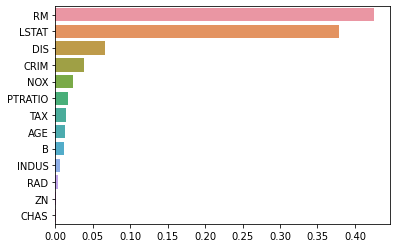

In [85]:
# 보스턴 주택 가격 모델의 피처별 중요도 시각화하기

import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


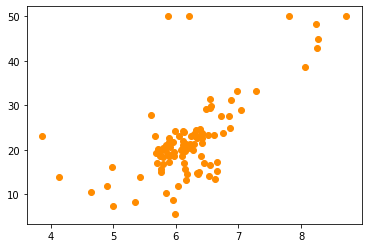

In [86]:
# 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교해 시각화하기
# max_depth의 크기를 변화시키면서 어떻게 회귀 트리 예측선이 변화하는지 살펴 보기

# 보스턴 데이터 세트의 개수를 100개만 샘플링하고 RM과 PRICE칼럼만 추출(직관적으로 예측값을 시각화하기 위함)
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [89]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테그트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

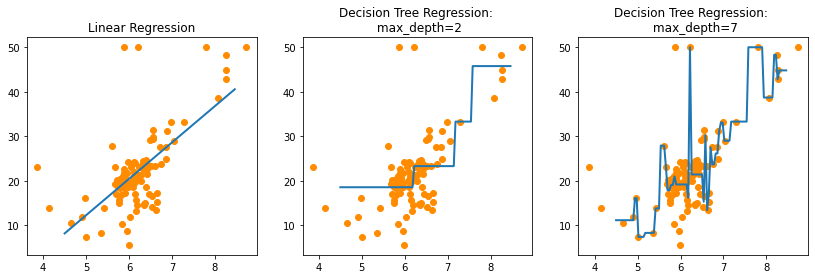

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# X축 값을 4.5 ~ 8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해, 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다. max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.

## 회귀 실습 - 자전거 대여 수요 예측
### 데이터 클렌징 및 가공

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('/Users/wizdom/Desktop/data_analysis/파이썬 머신러닝 완벽가이드/실습 데이터/bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [114]:
# 데이터 칼럼 살펴보자
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


대부분의 칼럼이 int 또는 float 숫자형인데, datatime 칼럼만 object형이다.

datatime 칼럼의 경우 년-월-일 시:분:초 문자 형식으로 되어 있으므로 이에 대한 가공이 필요하다. 판다스에서는 이러한 형태의 문자열을 년도, 월, 일, 시간, 분, 초로 편리하게 변환하려면 먼저 문자열을 'datatime' 타입으로 변경해야 한다. 판다스는 문자열을 datatime 타입으로 변환하는 **apply(pd.to_datetime)** 메서드 제공

In [115]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [116]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [117]:
# 다양한 회귀 모델을 데이터 세트에 적용해 예측 성능 측정

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 성능 평가 방법은 RMSLE로 한다. (오류값의 로그에 대한 RMSE)
# log값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# RMSLE, MSE, RMSE 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

### 로그 변환, 피처 인코딩과 모델 학습/예측/평가

In [118]:
# 회귀 모델을 이용해 자전거 대여 횟수 예측

# 먼저 LinearRegression 객체를 이용해 회귀 예측

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


실제 Target 데이터 값인 대여 횟수(count)를 감안하면 예측 오류로서는 비교적 큰 값이다.

In [119]:
# 실제 값과 예측값이 어느 정도 차이가 나는지 오류 값이 가장 큰 순으로 5개만 확인

def get_top_error_data(y_test, pred, n_tops=5):
    # dataframe의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    # 예측값과 실제 값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


가장 큰 상위 5위 오류 값은 546 ~ 568로 실제 값을 감안하면 예측 오류가 꽤 크다.

회귀에서 이렇게 큰 예측 오류가 발생할 경우 가장 먼저 살펴볼 것은 **Target 값의 분포가 왜곡된 형태를 이루고 있는지 확인**하는 것이다. Target값의 분포는 정규 분포 형태가 가장 좋은데 그렇지 않고 왜곡된 겨웅에는 회귀 예측 성능이 저하되는 경우가 발생하기 쉽다. 

<AxesSubplot:>

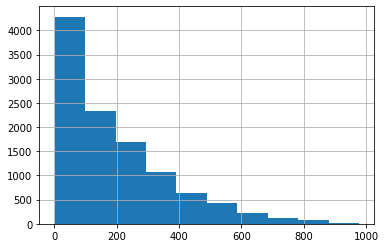

In [120]:
# hist()를 이용해 target값인 count칼럼이 정규분포 이루는지 확인 

y_target.hist()

count 칼럼 값이 정규 분포가 아닌 0~200 사이에 왜곡돼 있는 것을 알 수 있다.

이렇게 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법은 로그를 적용해 변환하는 것이다. 넘파이의 log1p()를 이용하자 ! 

<AxesSubplot:>

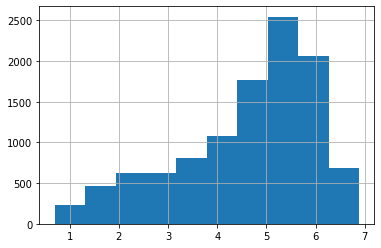

In [121]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

원하는 정규분포 형태를 아니지만 변환하기 전보다는 왜곡 정도가 많이 향상됐다.

In [122]:
# 이를 이용해 다시 학습한 후 평가 수행

# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


RMSLE 오류는 줄어들었지만, RMSE는 오히려 더 늘어났다.

<AxesSubplot:>

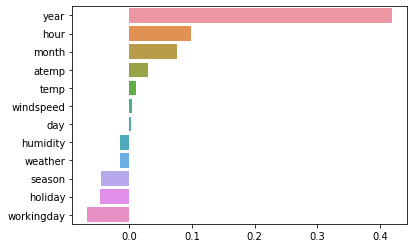

In [123]:
# 각 피처의 회귀 계수 값을 시각화 해보자

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

year피처의 회귀 계수 값이 독보적으로 큰 값을 가지고 있다. year피카테고리형 피처지만, 여기서는 숫자형 값으로 되어 있다. 따라서 이러한 피처들을 원-핫 인코딩을 적용해 변환해야 한다.

In [130]:
# 'year', 'month', 'day', 'hour' 등의 피처를 원-핫 인코딩
X_features_ohe = pd.get_dummies(X_features, columns=['year','month', 'day', 'hour', 'holiday',
                                                    'workingday', 'season', 'weather'])

In [131]:
# 선형 회귀, 릿지, 라쏘 모두 학습해 예측 성능 확인

# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환하는 함수
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.687, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


원-핫 인코딩을 적용하고 나서 선형 회귀의 예측 성능이 많이 향상되었다.

<AxesSubplot:>

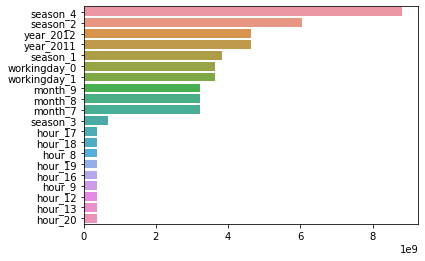

In [132]:
# 원-핫 인코딩된 데이터 세트에서 회귀 계수가 높은 피처 상위 20개를 다시 시각화하기

coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

선형 회귀 모델시 관련 피처들과 workingday 관련 피처들, 그리고 hour 관련 피처들의 회귀 꼐수가 높은 것을 알 수 있다. 월, 주말/주중, 그리고 시간대 등 상식선에서 자전거를 타는 데 필요한 피처의 회귀 계수가 높아졌다.

In [133]:
# 회귀 트리를 이용해 회귀 예측 수행

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LIghtGBM 모델 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 Dataframe이 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.458, MAE: 31.280
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.342, MAE: 32.744
[03:22:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.345, RMSE: 58.245, MAE: 35.768
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


앞의 선형 회귀 모델보다 회귀 에측 성능이 개선되었다. 하지만 이것이 회귀 트리가 선형 회귀보다 더 나은 성능을 가진다는 의미는 아니다 !

## 10. 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법
### 데이터 사전 처리(Processing)

In [61]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('/Users/wizdom/Desktop/data_analysis/파이썬 머신러닝 완벽가이드/실습 데이터/house_train.csv')
# 데이터 가공 많이 수행할 예정이므로 원본 csv파일 기반의 Dataframe은 보관하고 복사해서 데이터 가공한다.
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [62]:
print('데이터 세트의 Shape: ', house_df.shape)
print('\n 전체 피처의 type \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\n Null 칼럼과 그 건수: \n', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape:  (1460, 81)

 전체 피처의 type 
 object     43
int64      35
float64     3
dtype: int64

 Null 칼럼과 그 건수: 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


데이터 세트는 1460개의 레코드와 81개의 피처로 구성돼 있으며, Target을 제외한 80개의 피처 중 43개가 문자형이며 나머지가 숫자형이다. 그리고 데이터 양에 비해 Null값이 많은 피처들이 있는 것을 확인 할 수 있다.

<AxesSubplot:title={'center':'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

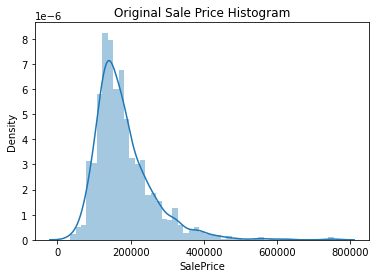

In [63]:
# 회귀 모델을 적용하기 전에 타깃 값의 분포도가 정규 분포인지 확인하기

plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

데이터 값의 분포가 중심에서 왼쪽으로 치우친 형태로, 정규 분포에서 벗어나 있다.

<AxesSubplot:title={'center':'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

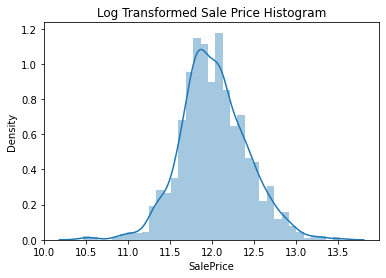

In [64]:
# 정규 분포가 아닌 결괏값을 정규 분포 형태로 변환하기 위해 로그 변환 적용하기

plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

로그 변환하니 정규 분포 형태로 결괏값이 분포함을 확인할 수 있다. 

In [65]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice'] # 원래 SalePrice 값 저장
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

# 드롭하지 않는 숫자형 Null 칼럼은 평균값으로 대체
house_df.fillna(house_df.mean(), inplace=True)

# Null 값이 있는 피처명과 타입을 추출(문자형)
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## Null 피처의 Type: \n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type: 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


- get_dummies() : 자동으로 문자열 피처를 원-핫 인코딩 변환하면서 Null값은 'None'칼럼으로 대체해주기 때문에 별도의 Null 값을 대체하는 로직이 필요하지 않다.

In [66]:
# 문자형 피처는 모두 원-핫 인코딩으로 변환
# 원핫인코딩을 적용하면 칼럼이 증가하므로 변환 후 얼마나 칼럼이 늘어났는지 확인해보자
print('get_dummise() 수행 전 데이터 Shape: ', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummise() 수행 후 데이터 Shape: ', house_df_ohe.shape)

# Null값 남아있는지 확인
null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]
print('## Null 피처의 Type: \n', house_df_ohe.dtypes[null_column_count.index])

get_dummise() 수행 전 데이터 Shape:  (1460, 75)
get_dummise() 수행 후 데이터 Shape:  (1460, 271)
## Null 피처의 Type: 
 Series([], dtype: object)


원-핫 인코딩 후 피처가 75개에서 272개로 증가함. 그리고 Null값을 가진 피처는 이제 없다.

### 선형 회귀 모델 학습/예측/평가

In [67]:
# 예측 평가는 RMSLE를 이용한다.
# 앞에서 SalePrice(타깃 값)가 로그 변환됐으므로 예측 결과 오류에 RMSE만 적용하면 RMSLE가 자동으로 측정된다.

# 단일 모델의 RMSE값 반환
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE: ', np.round(rmse, 3))
    return rmse

# get_rmse()를 이용해 여러 모델의 RMSE값 반환
def get_rmses(models):
    rmses = []
    for model in models :
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [68]:
# 선형회귀 모델 학습/예측/평가

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression 학습/예측/평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
# Ridge 학습/예측/평가
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# Lasso 학습/예측/평가
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.128
Lasso 로그 변환된 RMSE:  0.176


[0.1318957657915419, 0.12750846334053034, 0.17628250556471395]

라쏘 회귀의 경우 회귀 성능이 타 회귀 방식보다 많이 떨어지는 결과가 나왔다. (최적 하이퍼 파라미터 튜닝이 필요해 보임)

In [69]:
# 피처별 회귀 계수를 시각화해서 모델별로 ㅇㅓ떠한 피처의 회귀 계수로 구성되는지 확인

# 회귀 계수 값의 상위 10개, 하위 10개의 피처명과 그 회귀 계수 값을 가지는 판다스 Series 객체를 반환하는 함수
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # 상위 10개, 하위 10개의 회귀 계수를 추출해 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [70]:
print(get_top_bottom_coef(lr_reg, n=10))

(RoofMatl_Membran    0.528057
RoofMatl_Metal      0.414453
RoofMatl_WdShngl    0.345254
RoofMatl_Roll       0.311983
RoofStyle_Shed      0.292647
RoofMatl_CompShg    0.273884
GarageQual_Ex       0.261599
Condition2_RRNn     0.260054
RoofMatl_WdShake    0.256344
RoofMatl_Tar&Grv    0.242292
dtype: float64, Neighborhood_MeadowV   -0.228006
Condition2_RRAe        -0.243308
Electrical_FuseP       -0.258129
Heating_Grav           -0.264520
GarageCond_Ex          -0.265441
Electrical_Mix         -0.300984
MSZoning_C (all)       -0.323040
Functional_Maj2        -0.426389
Condition2_PosN        -0.663744
RoofMatl_ClyTile       -2.372268
dtype: float64)


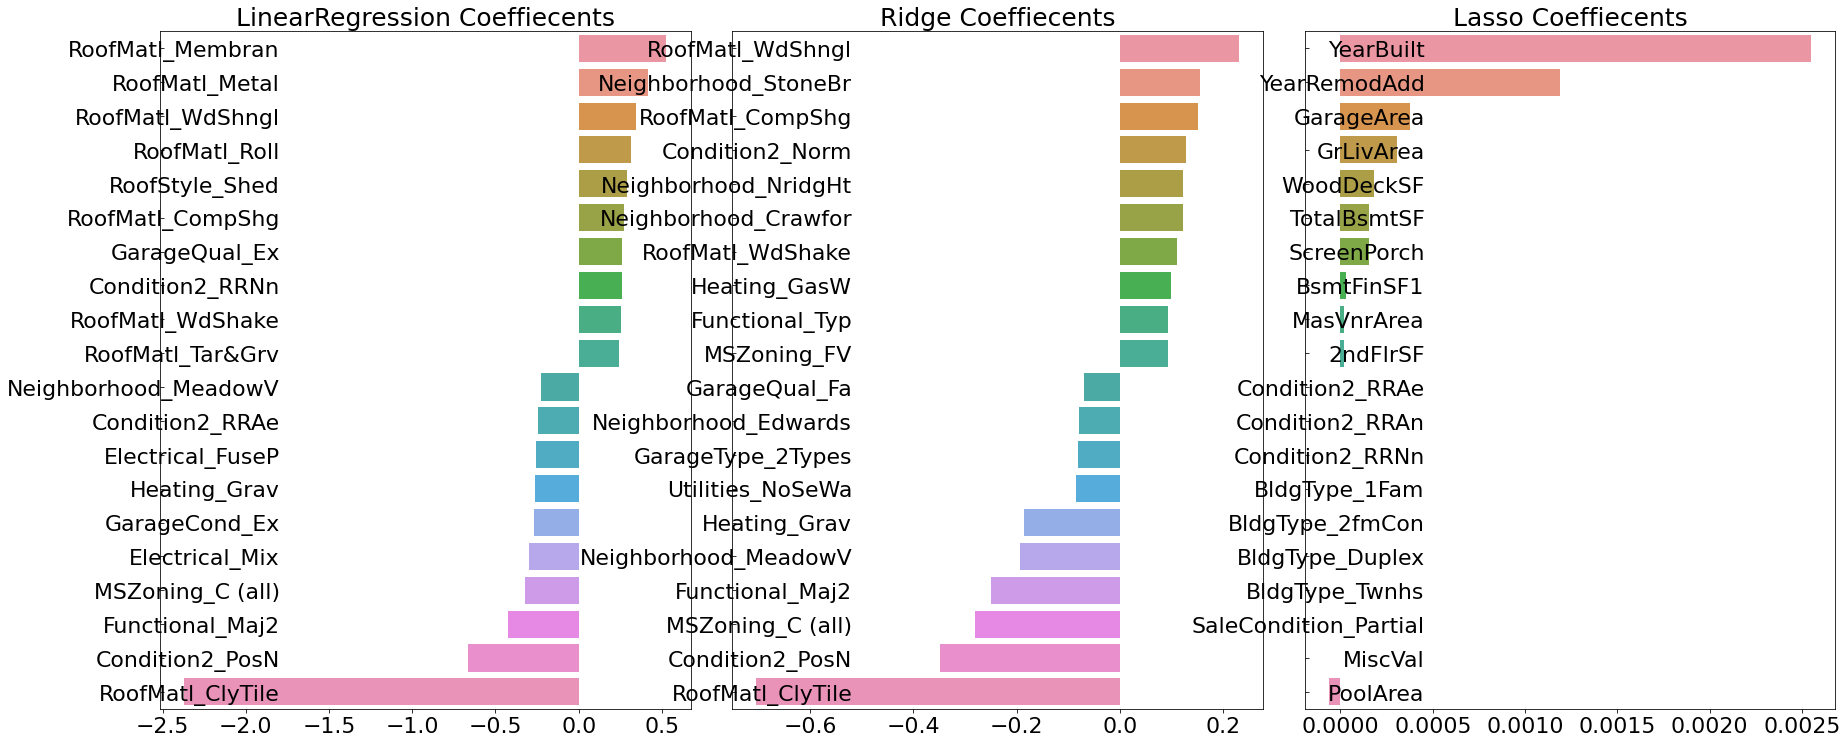

In [71]:
# get_top_bottom() 함수를 이용해 모델별 회귀 계수 시각화

# list 객체로 모델을 입력 받아 모델별로 회귀 계수 상위 10개, 하위 10개를 추출해 가로 막대 그래프 형태로 출력
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀 계수 ㅅㅣ각화
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        # ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y", direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

선형회귀와 릿지의 경우는 회귀계수가 유사한 형태로 분포돼 있다. 하지만 라쏘는 전체적으로 회귀 계수 값이 매우 작고, 그중 Yearbuilt가 가장 크고 다른 피처의 회귀 계수는 너무 작다.

In [72]:
# 라쏘에서 학습 데이터의 데이터 분할에 문제가 있어서 그런것인지, 학습과 테스트 데이터 세트를 train_test_split()으로 분할하지 않고
# 전체 데이터 세트인 X_features와 y_target을 4개의 교차 검증 폴드 세트로 분할해 평균 RMSE 측정

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score()수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, 
                                             scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))
        
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE 값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

Ridge CV RMSE값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


5개의 폴드 세트로 학습 한 후 평가해도 여전히 라쏘의 경우가 OLS 모델이나 릿지 모델보다 성능이 떨어진다.

In [73]:
# 릿지와 라쏘 모델에 대해 alpha 하이퍼 파라미터를 변화시키면서 최적값 도출

from sklearn.model_selection import GridSearchCV

# 모델과 하이퍼 파라미터 딕셔너리 객체를 받아 최적화 작업 결과를 표시하는 함수
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'.format(model.__class__.__name__,
                                                              np.round(rmse, 4), grid_model.best_params_))
    

ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha: {'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha: {'alpha': 0.001}


라쏘 모델의 경우, alpha값 최적화 이후 예측 성능이 많이 좋아졌다.

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.124
Lasso 로그 변환된 RMSE:  0.12


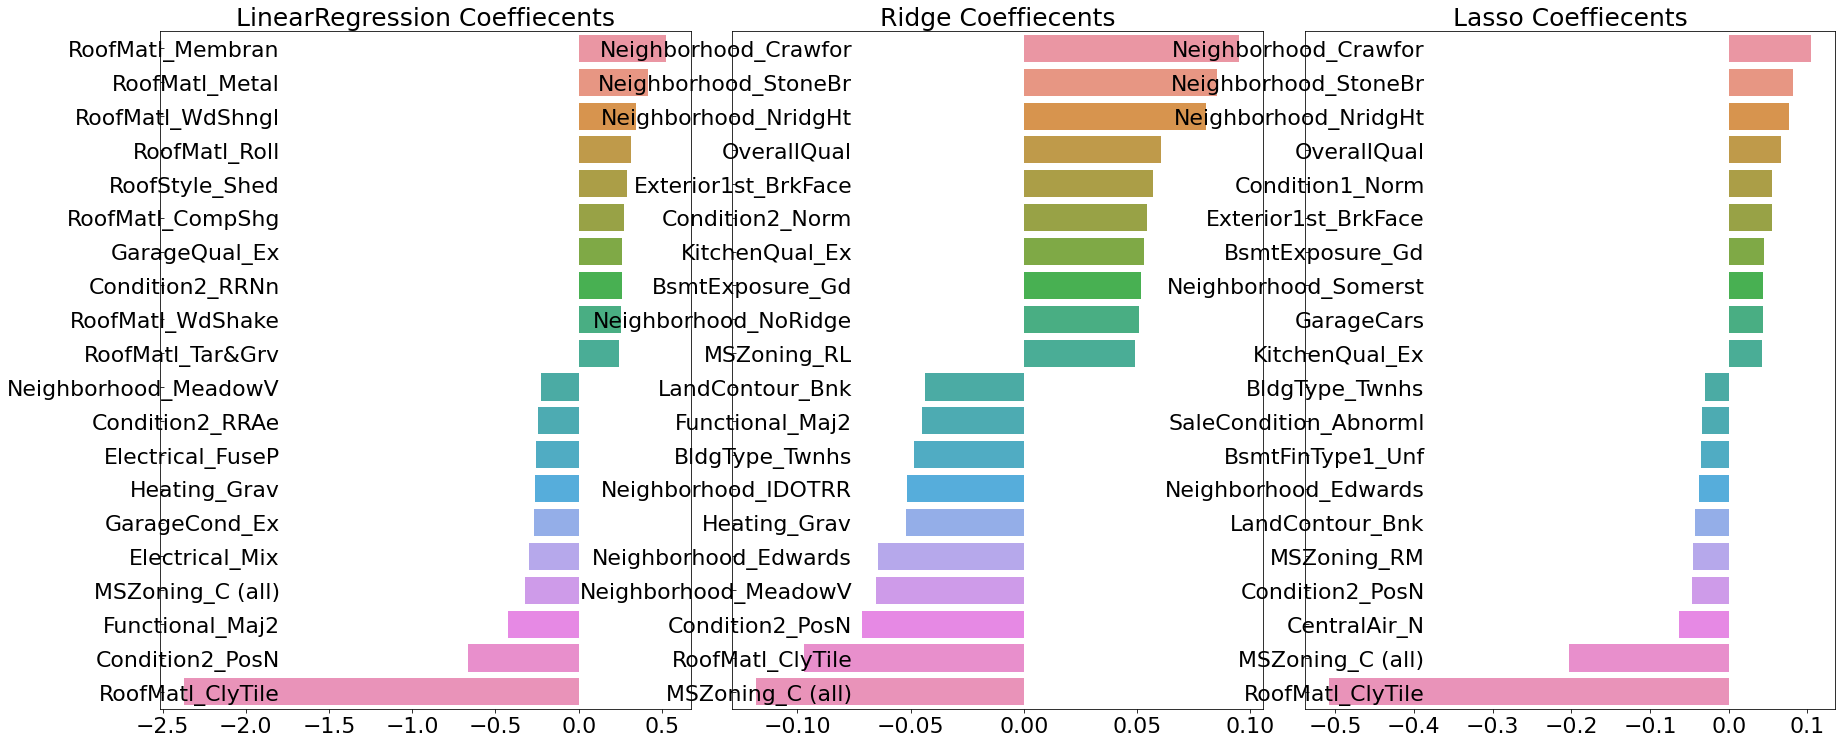

In [74]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

alpha값 최적화 후 테스트 데이터 세트의 예측 성능이 더 좋아졌다. 모델별 회귀 계수도 많이 달라졌다. 기존에는 라쏘 모델의 회귀 계수가 나머지 두 개 모델과 많은 차이가 있었지만, 이번에는 릿지와 라쏘 모델에서 비슷한 피처의 회귀 계수가 높다. 하지만 라쏘 모델의 경우는 릿지에 비해 동일한 피처라도 회귀 계수의 값이 상당히 작다.

#### 데이터세트 추가적으로 가공해서 모델 튜닝 진행하기
#### 1. 피처 데이터 세트의 데이터 분포도 살펴보기
피처 데이터 세트의 경우도 지나치게 왜곡된 피처가 존재할 경우 회귀 예측 성능을 저하시킬 수 있다. 

- **skew()** : 칼럼의 데이터 세트의 왜곡된 정돌르 쉽게 추출할 수 있다. 일반적으로 반환 값이 1이상인 경우를 왜곡 정도가 높다고 판단하지만 상황에 따라 편차는 있다.
- 주의할 점
	- skew()를 적용하는 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처는 제외해야 한다. 카테고리 피처는 코드성 피처이므로 인코딩시 당연히 왜곡될 가능성이 높다.

In [75]:
# 모든 숫자형 피처의 데이터 분포도를 확인해 분포도가 어느 정도로 왜곡됐는지 알아보자

from scipy.stats import skew

# 원-핫 인코딩이 적용되지 않은 데이터프레임인 house_df 이용
# object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환
# apply lambda로 skew() 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew 정도가 1ㅇㅣ상인 칼럼만 추출
skew_features_top = skew_features[skew_features >1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [76]:
# 추출된 왜곡 정도가 높은 피처를 로그 변환(왜곡 정도를 완화하기 위함)

house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

로그 변환 후 이 피처들의 왜곡 정도를 다시 확인해보면 여전히 높은 왜곡 정도를 가진 피처가 있지만, 더 이상 로그 변환을 하더라도 개선하기 어렵기에 그대로 유지한다.

In [77]:
# house_df의 피처를 일부 로그 변환했으므로 다시 원-핫 인코딩 적용
house_df_ohe = pd.get_dummies(house_df)
# 피처/타깃 데이터 세트 생성
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
# 학습/테스트 데이터 세트 생성
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                   test_size=0.2, random_state=156)

# 피처를 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1275, 최적 alpha: {'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha: {'alpha': 0.001}


릿지 모델의 경우 최적 alpha값이 12에서 10으로 변경됐고, 두 모델 모두 5 폴드 교차 검증의 평균 RMSE값이 향상되었다. (릿지 : 0.1418 -> 0.1275, 라쏘 : 0.142 -> 0.1252)

LinearRegression 로그 변환된 RMSE:  0.128
Ridge 로그 변환된 RMSE:  0.122
Lasso 로그 변환된 RMSE:  0.119


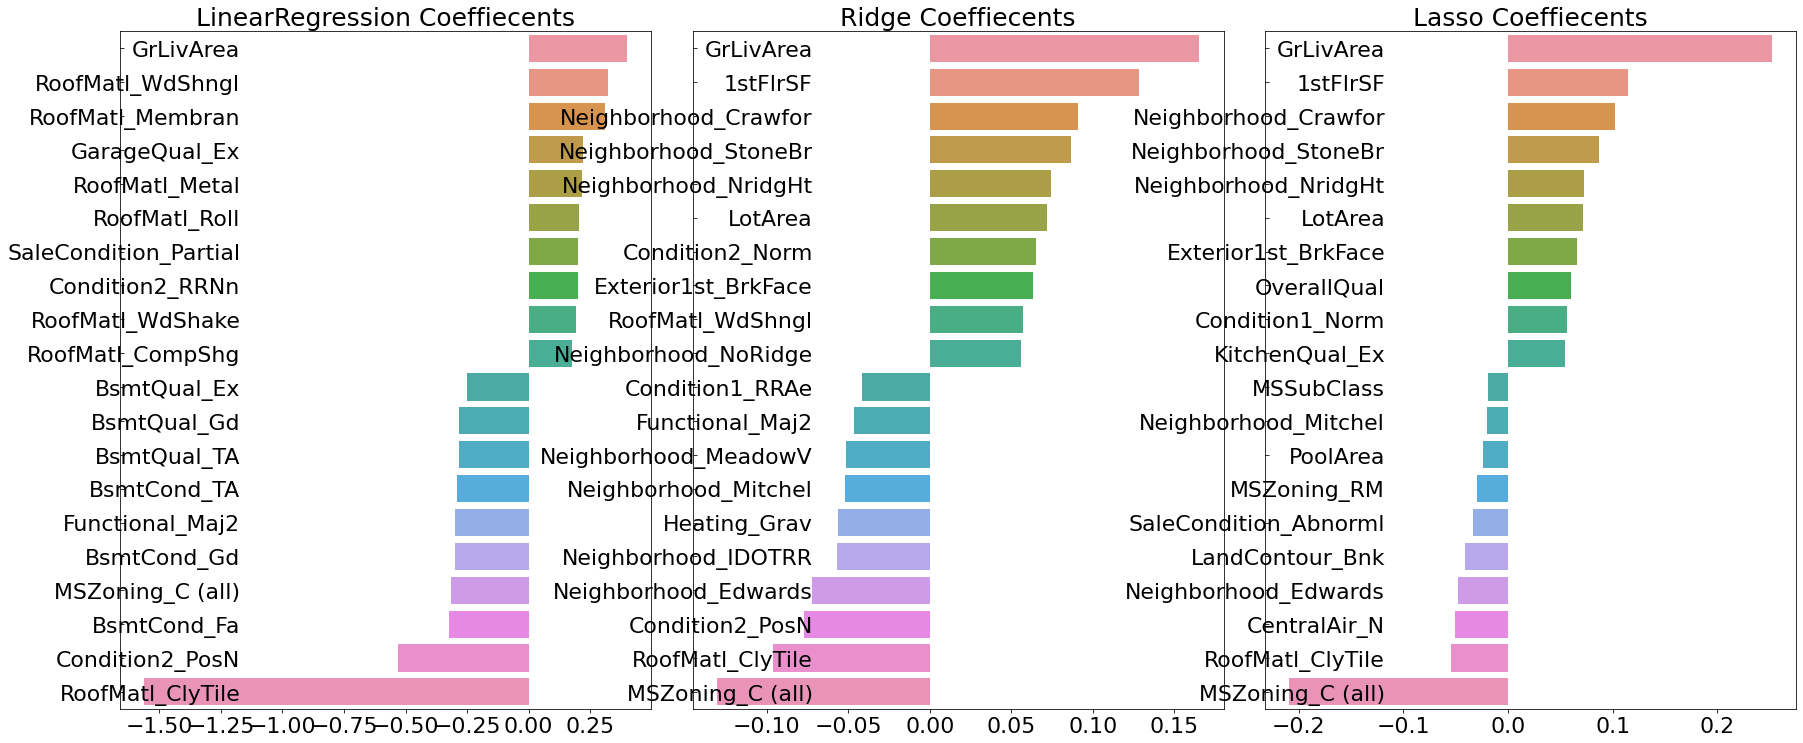

In [78]:
# 다시 모델의 학습/예측/평가 및 모델별 회귀 계수 시각화 

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

세 모델 모두 GrLivArea, 즉 주거공간 크기가 회귀 계수가 가장 높은 피처가 됐다.

#### 2. 이상치 데이터 살펴보기

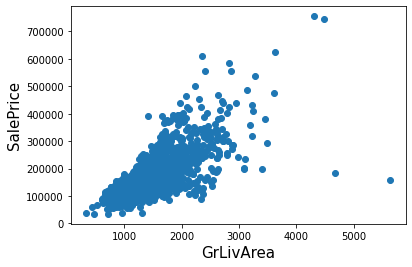

In [79]:
# 가장 큰 회귀 계수를 가지는 GrLivArea 피처의 데이터 분포 살펴보기

# 주택 가격 데이터가 변환되기 이전의 원본 데이터 세트인 house_df_org에서 
# GrLivArea와 타깃값인 SalePrice관계 시각화
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

GrLivArea 피처는 SalePrice와 양의 상관도가 매우 높음을 알 수 있다. 하지만 이상치 데이터가 2개가 보인다. 이는 일반적인 GrLivArea와 SalePrice 관계에서 너무 어긋나 있다.

In [80]:
# GrLivArea가 4000평방피트 이상임에도 가격이 500,000달러 이하인 데이터는 모두 이상치로 간주하고 삭제하기
# 데이터 변환이 모두 완료된 house_df_ohe에서 대상 데이터 필터링
# 로그 변환된 값들이므로 이를 반영한 조건 생성하기
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 레코드 index :', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

# DataFrame의 index를 이용하여 이상치 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

이상치 레코드 index : [ 523 1298]
이상치 삭제 전 house_df_ohe shape: (1460, 271)
이상치 삭제 후 house_df_ohe shape: (1458, 271)


In [81]:
# 업데이트된 house_df_ohe를 기반으로 피처/타깃 데이터 세트 생성
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 릿지와 라쏘 모델의 최적화 수행 결과 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha: {'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha: {'alpha': 0.001}


두개의 이상치 데이터만 제거했는데, 예측 수치가 매우 크게 향상되었다. 
그리고 릿지 모델의 경우 최적 alpha값은 8로 변했고 평균 RMSE가 0.1275에서 0.1125로 개선되었다. 라쏘 모델의 경우는 평균 RMSE가 0.1252에서 0.1122로 개션되었다. 


회귀모델에서 차지하는 영향도가 큰 피처에서 이상치를 개선하는 것이 성능 개선에 큰 의미를 가진다는 것을 알 수 있다.

LinearRegression 로그 변환된 RMSE:  0.129
Ridge 로그 변환된 RMSE:  0.103
Lasso 로그 변환된 RMSE:  0.1


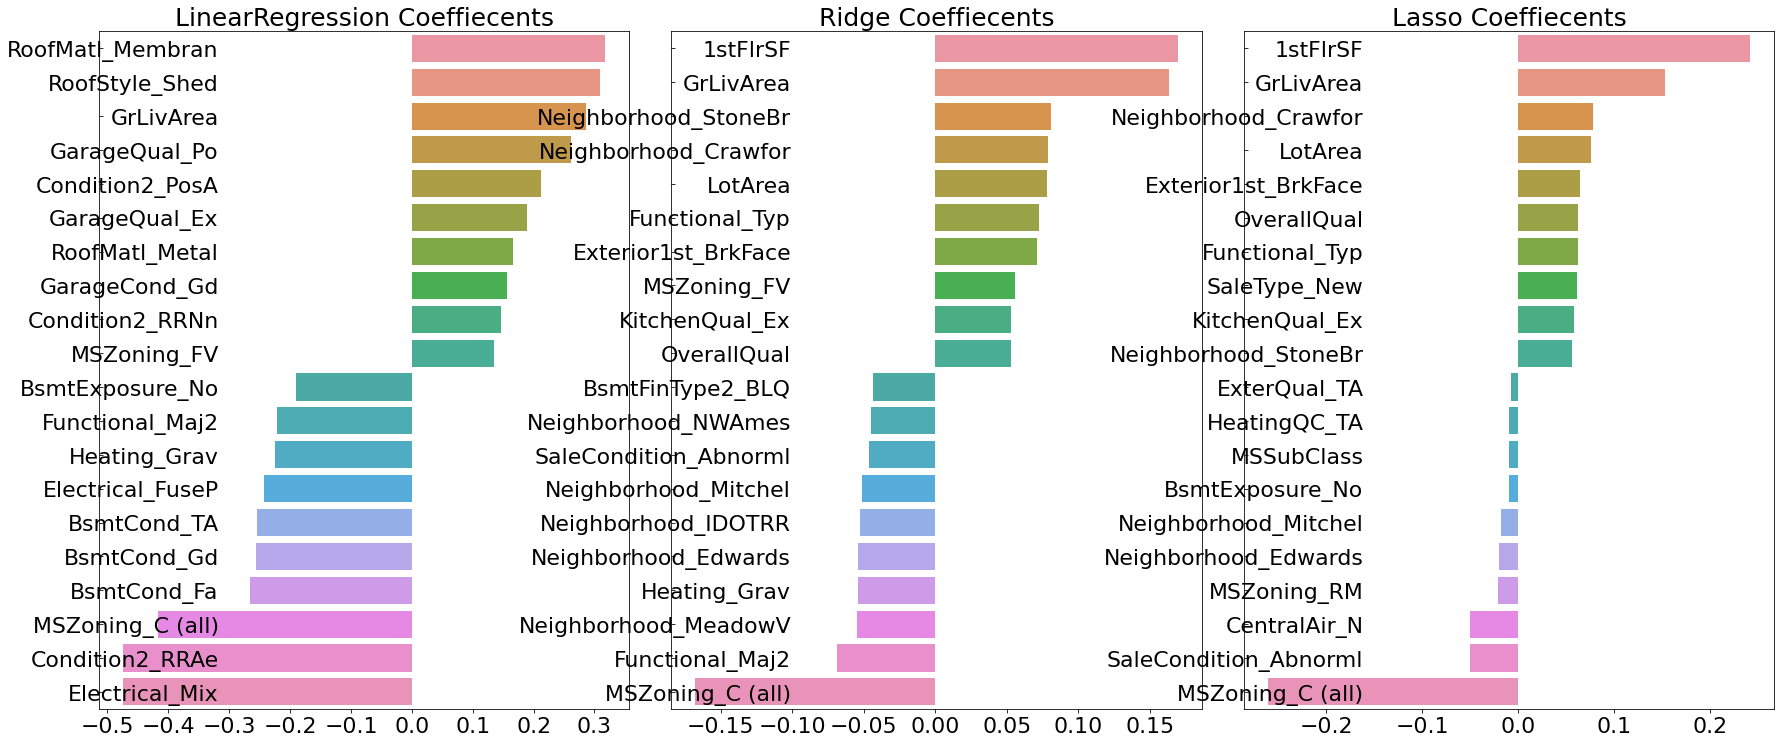

In [83]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 회귀 트리 모델 학습/예측/평가
회귀트리를 이용해 회귀 모델 만들기

In [84]:
# XGBoost 회귀 트리 적용
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

[19:21:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:22:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1154, 최적 alpha: {'n_estimators': 1000}


In [85]:
# LightGBM 회귀 트리 적용 
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1163, 최적 alpha: {'n_estimators': 1000}


In [ ]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(data=, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

In [89]:
# 개별 회귀 모델의 예측 결괏값을 혼합해 이를 기반으로 최종 회귀 값 예측

# 최종 혼합 모델, 개별 모델의 RMSE값 출력하는 함수 생성
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10007930884470514
Ridge 모델의 RMSE: 0.10345177546603275
Lasso 모델의 RMSE: 0.10024170460890032


최종 혼합 모델의 RMSE가 개별 모델보다 성능 면에서 약간 개선되었다.

In [90]:
# XGBoost와 LightGBM 혼합하기

xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

[19:40:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE: 0.10120744263164827
XGBM 모델의 RMSE: 0.10330582591553708
LGBM 모델의 RMSE: 0.10382510019327311


### 스태킹 모델을 통한 회귀 예측

In [91]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [92]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[19:41:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[19:41:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[19:41:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[19:41:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[19:42:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시

In [93]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09759517434348712
